# Hackathon

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
pd.set_option("display.max_columns",100)
pd.options.display.max_seq_items = 2000

In [3]:
data_train = pd.read_csv('train_labels.csv')
data_track = pd.read_csv('train_player_tracking.csv')
data_geo = pd.read_csv('geo_feats.csv')

/var/folders/z2/rdt7vxy91fz7f7gkqbtqbgk40000gn/T/ipykernel_71549/3780383852.py:3: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data_geo = pd.read_csv('geo_feats.csv')


In [4]:
data_train.head()

,contact_id,game_play,datetime,step,nfl_player_id_1,nfl_player_id_2,contact
0,58168_003392_0_38590_43854,58168_003392,2020-09-11T03:01:48.100Z,0,38590,43854,0
1,58168_003392_0_38590_41257,58168_003392,2020-09-11T03:01:48.100Z,0,38590,41257,0
2,58168_003392_0_38590_41944,58168_003392,2020-09-11T03:01:48.100Z,0,38590,41944,0
3,58168_003392_0_38590_42386,58168_003392,2020-09-11T03:01:48.100Z,0,38590,42386,0
4,58168_003392_0_38590_47944,58168_003392,2020-09-11T03:01:48.100Z,0,38590,47944,0


In [5]:
data_track.head()

,game_play,game_key,play_id,nfl_player_id,datetime,step,team,position,jersey_number,x_position,y_position,speed,distance,direction,orientation,acceleration,sa
0,58580_001136,58580,1136,44830,2021-10-10T21:08:20.900Z,-108,away,CB,22,61.59,42.60,1.11,0.11,320.33,263.93,0.71,-0.64
1,58580_001136,58580,1136,47800,2021-10-10T21:08:20.900Z,-108,away,DE,97,59.48,26.81,0.23,0.01,346.84,247.16,1.29,0.90
2,58580_001136,58580,1136,52444,2021-10-10T21:08:20.900Z,-108,away,FS,29,72.19,31.46,0.61,0.06,11.77,247.69,0.63,-0.33
3,58580_001136,58580,1136,46206,2021-10-10T21:08:20.900Z,-108,home,TE,86,57.37,22.12,0.37,0.04,127.85,63.63,0.69,0.62
4,58580_001136,58580,1136,52663,2021-10-10T21:08:20.900Z,-108,away,ILB,48,63.25,27.50,0.51,0.05,183.62,253.71,0.31,0.31


### Preprocess Data Keys

In [6]:
!which python

/Users/ET92ZFW/Projects/ML4Askuity/8_Hackathon/venv-hackathon/bin/python


In [7]:
data_train.describe()

,step,nfl_player_id_1,contact
count,4.721618e+06,4.721618e+06,4.721618e+06
mean,4.074472e+01,4.249579e+04,1.366523e-02
std,2.683546e+01,4.342500e+03,1.160969e-01
min,0.000000e+00,2.551100e+04,0.000000e+00
25%,1.900000e+01,4.007000e+04,0.000000e+00
50%,3.800000e+01,4.266700e+04,0.000000e+00
75%,5.900000e+01,4.500500e+04,0.000000e+00
max,1.720000e+02,5.398500e+04,1.000000e+00


In [8]:
data_train.isna().sum()

contact_id         0
game_play          0
datetime           0
step               0
nfl_player_id_1    0
nfl_player_id_2    0
contact            0
dtype: int64

In [9]:
data_train.shape

(4721618, 7)

In [10]:
data_train['game_key'] = data_train.contact_id.str.split("_", expand=True)[0]

In [11]:
data_train['play_id'] = data_train.contact_id.str.split("_", expand=True)[1]

In [12]:
data_train['game_play'] = data_train['game_key'] + '_' + data_train['play_id'] 

In [13]:
data_train['play_id'] = data_train['play_id'].astype('int')
data_train['game_key'] = data_train['game_key'].astype('int')
data_train['nfl_player_id_1'] = data_train['nfl_player_id_1'].astype('str')
data_train['nfl_player_id_2'] = data_train['nfl_player_id_2'].astype('str')

In [14]:
data_train.head()

,contact_id,game_play,datetime,step,nfl_player_id_1,nfl_player_id_2,contact,game_key,play_id
0,58168_003392_0_38590_43854,58168_003392,2020-09-11T03:01:48.100Z,0,38590,43854,0,58168,3392
1,58168_003392_0_38590_41257,58168_003392,2020-09-11T03:01:48.100Z,0,38590,41257,0,58168,3392
2,58168_003392_0_38590_41944,58168_003392,2020-09-11T03:01:48.100Z,0,38590,41944,0,58168,3392
3,58168_003392_0_38590_42386,58168_003392,2020-09-11T03:01:48.100Z,0,38590,42386,0,58168,3392
4,58168_003392_0_38590_47944,58168_003392,2020-09-11T03:01:48.100Z,0,38590,47944,0,58168,3392


In [15]:
data_train.dtypes

contact_id         object
game_play          object
datetime           object
step                int64
nfl_player_id_1    object
nfl_player_id_2    object
contact             int64
game_key            int64
play_id             int64
dtype: object

In [16]:
data_track.dtypes

game_play         object
game_key           int64
play_id            int64
nfl_player_id      int64
datetime          object
step               int64
team              object
position          object
jersey_number      int64
x_position       float64
y_position       float64
speed            float64
distance         float64
direction        float64
orientation      float64
acceleration     float64
sa               float64
dtype: object

In [17]:
data_track['nfl_player_id'] = data_track['nfl_player_id'].astype('str')

### Exploration

In [18]:
# Only 16 times in all of dataset has player made contact in the first two steps of the game
data_train[data_train.step.isin([0,1])].groupby('contact').step.count()

contact
0    121380
1        16
Name: step, dtype: int64

### Merge Data

In [19]:
# QC tracking data
data_track.groupby(['game_play', 'nfl_player_id','step']).datetime.count().sort_values(ascending=False)
# so the data is unique at game_play, player_id, step level

game_play     nfl_player_id  step
58168_003392  37084          -185    1
58491_001948  42033           31     1
                              29     1
                              28     1
                              27     1
                                    ..
58273_003282  39993           44     1
                              43     1
                              42     1
                              41     1
58582_003121  52619           120    1
Name: datetime, Length: 1353053, dtype: int64

In [20]:
# Check to see if we have equal number of distinct datetime and step values. Validates the assumption is right
test = data_track.groupby(['game_play', 'nfl_player_id'])['datetime','step'].nunique()
test[test.datetime!=test.step]

/var/folders/z2/rdt7vxy91fz7f7gkqbtqbgk40000gn/T/ipykernel_71549/2621276614.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  test = data_track.groupby(['game_play', 'nfl_player_id'])['datetime','step'].nunique()


,,datetime,step
game_play,nfl_player_id,,


In [21]:
data_train.shape

(4721618, 9)

In [22]:
data_train = data_train.merge(data_track, left_on = ['game_play', 'nfl_player_id_1', 'step'], \
                 right_on = ['game_play', 'nfl_player_id', 'step'], how ='left',suffixes=[None,'_id_1'])

In [23]:
data_train.drop('nfl_player_id', axis=1,inplace=True)

In [24]:
data_train.shape

(4721618, 23)

In [25]:
data_train.isna().sum()

contact_id         0
game_play          0
datetime           0
step               0
nfl_player_id_1    0
nfl_player_id_2    0
contact            0
game_key           0
play_id            0
game_key_id_1      0
play_id_id_1       0
datetime_id_1      0
team               0
position           0
jersey_number      0
x_position         0
y_position         0
speed              0
distance           0
direction          0
orientation        0
acceleration       0
sa                 0
dtype: int64

### Feature Engineering

In [26]:
data_train.head()

,contact_id,game_play,datetime,step,nfl_player_id_1,nfl_player_id_2,contact,game_key,play_id,game_key_id_1,play_id_id_1,datetime_id_1,team,position,jersey_number,x_position,y_position,speed,distance,direction,orientation,acceleration,sa
0,58168_003392_0_38590_43854,58168_003392,2020-09-11T03:01:48.100Z,0,38590,43854,0,58168,3392,58168,3392,2020-09-11T03:01:48.100Z,home,G,70,40.33,25.28,0.52,0.06,141.08,100.37,0.59,0.58
1,58168_003392_0_38590_41257,58168_003392,2020-09-11T03:01:48.100Z,0,38590,41257,0,58168,3392,58168,3392,2020-09-11T03:01:48.100Z,home,G,70,40.33,25.28,0.52,0.06,141.08,100.37,0.59,0.58
2,58168_003392_0_38590_41944,58168_003392,2020-09-11T03:01:48.100Z,0,38590,41944,0,58168,3392,58168,3392,2020-09-11T03:01:48.100Z,home,G,70,40.33,25.28,0.52,0.06,141.08,100.37,0.59,0.58
3,58168_003392_0_38590_42386,58168_003392,2020-09-11T03:01:48.100Z,0,38590,42386,0,58168,3392,58168,3392,2020-09-11T03:01:48.100Z,home,G,70,40.33,25.28,0.52,0.06,141.08,100.37,0.59,0.58
4,58168_003392_0_38590_47944,58168_003392,2020-09-11T03:01:48.100Z,0,38590,47944,0,58168,3392,58168,3392,2020-09-11T03:01:48.100Z,home,G,70,40.33,25.28,0.52,0.06,141.08,100.37,0.59,0.58


In [27]:
data_track_eng = data_track[['game_play', 'nfl_player_id', 'step'
                            ,'x_position', 'y_position', 'speed', 'distance', 'direction', 'orientation'
                            ,'acceleration', 'sa']]

In [28]:
data_track_eng = data_track_eng.sort_values(['game_play', 'nfl_player_id', 'step'])

In [29]:
features = ['x_position', 'y_position', 'speed', 'distance', 'direction',\
                  'orientation', 'acceleration', 'sa']

features_lag1 = ['x_position_lag1', 'y_position_lag1', 'speed_lag1',\
                'distance_lag1', 'direction_lag1', 'orientation_lag1',\
                'acceleration_lag1', 'sa_lag1']

features_lag2 = ['x_position_lag2', 'y_position_lag2', 'speed_lag2',\
                'distance_lag2', 'direction_lag2', 'orientation_lag2',\
                'acceleration_lag2', 'sa_lag2']

In [30]:
data_track_eng[features_lag1] = \
                data_track_eng.groupby(['game_play', 'nfl_player_id'])\
                [features].shift(1)

In [31]:
data_track_eng[features_lag2] = \
                data_track_eng.groupby(['game_play', 'nfl_player_id'])\
                [features].shift(2)

In [32]:
data_track_eng.head()

,game_play,nfl_player_id,step,x_position,y_position,speed,distance,direction,orientation,acceleration,sa,x_position_lag1,y_position_lag1,speed_lag1,distance_lag1,direction_lag1,orientation_lag1,acceleration_lag1,sa_lag1,x_position_lag2,y_position_lag2,speed_lag2,distance_lag2,direction_lag2,orientation_lag2,acceleration_lag2,sa_lag2
1073505,58168_003392,37084,-185,42.91,20.14,0.15,0.02,145.50,326.04,0.33,0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1073534,58168_003392,37084,-184,42.92,20.13,0.19,0.02,137.38,323.44,0.30,0.28,42.91,20.14,0.15,0.02,145.50,326.04,0.33,0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1073554,58168_003392,37084,-183,42.94,20.11,0.25,0.03,142.93,321.67,0.32,0.31,42.92,20.13,0.19,0.02,137.38,323.44,0.30,0.28,42.91,20.14,0.15,0.02,145.50,326.04,0.33,0.28
1073560,58168_003392,37084,-182,42.95,20.09,0.26,0.02,144.15,319.22,0.19,0.18,42.94,20.11,0.25,0.03,142.93,321.67,0.32,0.31,42.92,20.13,0.19,0.02,137.38,323.44,0.30,0.28
1073591,58168_003392,37084,-181,42.97,20.07,0.25,0.02,139.81,316.21,0.04,0.04,42.95,20.09,0.26,0.02,144.15,319.22,0.19,0.18,42.94,20.11,0.25,0.03,142.93,321.67,0.32,0.31


In [33]:
feats_diff_within = ['speed','distance', 'direction', 'orientation', 'acceleration', 'sa']

for feats in feats_diff_within:
    data_track_eng[feats + '_diff_w' + '_lag1' + '_lag2'] = data_track_eng[feats+'_lag1'] - data_track_eng[feats+'_lag2']
    data_track_eng[feats + '_diff_w' + '_lag1'] = data_track_eng[feats] - data_track_eng[feats+'_lag1']

In [34]:
# columns to keep

keys = ['game_play', 'nfl_player_id', 'step']

feats_diff_w_cols = [col + '_diff_w' + '_lag1' + '_lag2' for col in feats_diff_within] + \
                    [col + '_diff_w' + '_lag1' for col in feats_diff_within]

feats_lag = ['x_position_lag1', 'y_position_lag1', 'x_position_lag2', 'y_position_lag2']

all_cols = keys + feats_diff_w_cols + feats_lag

data_track_eng[all_cols]

,game_play,nfl_player_id,step,speed_diff_w_lag1_lag2,distance_diff_w_lag1_lag2,direction_diff_w_lag1_lag2,orientation_diff_w_lag1_lag2,acceleration_diff_w_lag1_lag2,sa_diff_w_lag1_lag2,speed_diff_w_lag1,distance_diff_w_lag1,direction_diff_w_lag1,orientation_diff_w_lag1,acceleration_diff_w_lag1,sa_diff_w_lag1,x_position_lag1,y_position_lag1,x_position_lag2,y_position_lag2
1073505,58168_003392,37084,-185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1073534,58168_003392,37084,-184,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.00,-8.12,-2.60,-0.03,0.00,42.91,20.14,NaN,NaN
1073554,58168_003392,37084,-183,0.04,0.00,-8.12,-2.60,-0.03,0.00,0.06,0.01,5.55,-1.77,0.02,0.03,42.92,20.13,42.91,20.14
1073560,58168_003392,37084,-182,0.06,0.01,5.55,-1.77,0.02,0.03,0.01,-0.01,1.22,-2.45,-0.13,-0.13,42.94,20.11,42.92,20.13
1073591,58168_003392,37084,-181,0.01,-0.01,1.22,-2.45,-0.13,-0.13,-0.01,0.00,-4.34,-3.01,-0.15,-0.14,42.95,20.09,42.94,20.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9303,58582_003121,52619,116,-0.04,-0.01,4.56,2.36,0.36,-0.16,-0.10,0.00,4.82,-3.66,0.06,-0.26,62.18,22.02,62.05,22.03
9306,58582_003121,52619,117,-0.10,0.00,4.82,-3.66,0.06,-0.26,-0.04,-0.01,6.44,-6.31,0.11,-0.02,62.30,22.00,62.18,22.02
9348,58582_003121,52619,118,-0.04,-0.01,6.44,-6.31,0.11,-0.02,0.06,0.00,7.76,-3.13,0.02,0.34,62.42,21.96,62.30,22.00
9369,58582_003121,52619,119,0.06,0.00,7.76,-3.13,0.02,0.34,0.01,0.01,5.33,-9.47,-0.04,0.10,62.53,21.91,62.42,21.96


In [35]:
# merging for player 1

feats_cols_id_1 = feats_diff_w_cols + feats_lag

feats_cols_id_1 = [feats + '_id_1' for feats in feats_cols_id_1]

new_cols_name = keys + feats_cols_id_1

data_track_eng_id_1 = data_track_eng[all_cols]

data_track_eng_id_1.columns = new_cols_name

data_track_eng_id_1.head()

,game_play,nfl_player_id,step,speed_diff_w_lag1_lag2_id_1,distance_diff_w_lag1_lag2_id_1,direction_diff_w_lag1_lag2_id_1,orientation_diff_w_lag1_lag2_id_1,acceleration_diff_w_lag1_lag2_id_1,sa_diff_w_lag1_lag2_id_1,speed_diff_w_lag1_id_1,distance_diff_w_lag1_id_1,direction_diff_w_lag1_id_1,orientation_diff_w_lag1_id_1,acceleration_diff_w_lag1_id_1,sa_diff_w_lag1_id_1,x_position_lag1_id_1,y_position_lag1_id_1,x_position_lag2_id_1,y_position_lag2_id_1
1073505,58168_003392,37084,-185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1073534,58168_003392,37084,-184,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.00,-8.12,-2.60,-0.03,0.00,42.91,20.14,NaN,NaN
1073554,58168_003392,37084,-183,0.04,0.00,-8.12,-2.60,-0.03,0.00,0.06,0.01,5.55,-1.77,0.02,0.03,42.92,20.13,42.91,20.14
1073560,58168_003392,37084,-182,0.06,0.01,5.55,-1.77,0.02,0.03,0.01,-0.01,1.22,-2.45,-0.13,-0.13,42.94,20.11,42.92,20.13
1073591,58168_003392,37084,-181,0.01,-0.01,1.22,-2.45,-0.13,-0.13,-0.01,0.00,-4.34,-3.01,-0.15,-0.14,42.95,20.09,42.94,20.11


In [36]:
# # merging for player 2

# feats_cols_id_2 = feats_diff_w_cols + feats_lag

# feats_cols_id_2 = [feats + '_id_2' for feats in feats_cols_id_2]

# new_cols_name = keys + feats_cols_id_2

# data_track_eng_id_2 = data_track_eng[all_cols]

# data_track_eng_id_2.columns = new_cols_name

# data_track_eng_id_2.head()

In [37]:
data_train = data_train.merge(data_track_eng_id_1, left_on=['game_play', 'nfl_player_id_1', 'step']\
                 , right_on=keys, how='left')

In [38]:
data_train.head()

,contact_id,game_play,datetime,step,nfl_player_id_1,nfl_player_id_2,contact,game_key,play_id,game_key_id_1,play_id_id_1,datetime_id_1,team,position,jersey_number,x_position,y_position,speed,distance,direction,orientation,acceleration,sa,nfl_player_id,speed_diff_w_lag1_lag2_id_1,distance_diff_w_lag1_lag2_id_1,direction_diff_w_lag1_lag2_id_1,orientation_diff_w_lag1_lag2_id_1,acceleration_diff_w_lag1_lag2_id_1,sa_diff_w_lag1_lag2_id_1,speed_diff_w_lag1_id_1,distance_diff_w_lag1_id_1,direction_diff_w_lag1_id_1,orientation_diff_w_lag1_id_1,acceleration_diff_w_lag1_id_1,sa_diff_w_lag1_id_1,x_position_lag1_id_1,y_position_lag1_id_1,x_position_lag2_id_1,y_position_lag2_id_1
0,58168_003392_0_38590_43854,58168_003392,2020-09-11T03:01:48.100Z,0,38590,43854,0,58168,3392,58168,3392,2020-09-11T03:01:48.100Z,home,G,70,40.33,25.28,0.52,0.06,141.08,100.37,0.59,0.58,38590,0.1,0.01,1.27,1.42,0.04,0.06,0.14,0.02,1.04,1.57,0.12,0.12,40.3,25.33,40.27,25.36
1,58168_003392_0_38590_41257,58168_003392,2020-09-11T03:01:48.100Z,0,38590,41257,0,58168,3392,58168,3392,2020-09-11T03:01:48.100Z,home,G,70,40.33,25.28,0.52,0.06,141.08,100.37,0.59,0.58,38590,0.1,0.01,1.27,1.42,0.04,0.06,0.14,0.02,1.04,1.57,0.12,0.12,40.3,25.33,40.27,25.36
2,58168_003392_0_38590_41944,58168_003392,2020-09-11T03:01:48.100Z,0,38590,41944,0,58168,3392,58168,3392,2020-09-11T03:01:48.100Z,home,G,70,40.33,25.28,0.52,0.06,141.08,100.37,0.59,0.58,38590,0.1,0.01,1.27,1.42,0.04,0.06,0.14,0.02,1.04,1.57,0.12,0.12,40.3,25.33,40.27,25.36
3,58168_003392_0_38590_42386,58168_003392,2020-09-11T03:01:48.100Z,0,38590,42386,0,58168,3392,58168,3392,2020-09-11T03:01:48.100Z,home,G,70,40.33,25.28,0.52,0.06,141.08,100.37,0.59,0.58,38590,0.1,0.01,1.27,1.42,0.04,0.06,0.14,0.02,1.04,1.57,0.12,0.12,40.3,25.33,40.27,25.36
4,58168_003392_0_38590_47944,58168_003392,2020-09-11T03:01:48.100Z,0,38590,47944,0,58168,3392,58168,3392,2020-09-11T03:01:48.100Z,home,G,70,40.33,25.28,0.52,0.06,141.08,100.37,0.59,0.58,38590,0.1,0.01,1.27,1.42,0.04,0.06,0.14,0.02,1.04,1.57,0.12,0.12,40.3,25.33,40.27,25.36


In [39]:
# def Euclidean_Dist(df, cols_1=['x_coord','y_coord'], cols_2=['x_coord','y_coord']):
#     return np.linalg.norm(df[cols_1].values - df[cols_2].values,
#                    axis=1)

In [40]:
# Euclidean_Dist(data_train, cols_1=['x_position_lag1_id_1','y_position_lag1_id_1'], \
#                cols_2=['x_position_lag1_id_2','y_position_lag1_id_2'])

In [41]:
# data_train['dist_lag2'] =  Euclidean_Dist(data_train, cols_1=['x_position_lag2_id_1','y_position_lag2_id_1'], \
#                cols_2=['x_position_lag2_id_2','y_position_lag2_id_2'])

In [42]:
# data_train['dist_lag1'] =  Euclidean_Dist(data_train, cols_1=['x_position_lag1_id_1','y_position_lag1_id_1'], \
#                cols_2=['x_position_lag1_id_2','y_position_lag1_id_2'])

In [43]:
# data_train['dist'] =  Euclidean_Dist(data_train, cols_1=['x_position_id_1','y_position_id_1'], \
#                cols_2=['x_position_id_2','y_position_id_2'])

In [44]:
# data_train['dist_lag1_lag2'] = data_train['dist_lag1'] - data_train['dist_lag2']

In [45]:
# data_train['dist_current_lag1'] = data_train['dist'] - data_train['dist_lag1']

In [46]:
# data_train

### Building Model P-G

In [47]:
print(data_train[data_train.nfl_player_id_2 =='G'].isna().sum().to_string())

contact_id                            0
game_play                             0
datetime                              0
step                                  0
nfl_player_id_1                       0
nfl_player_id_2                       0
contact                               0
game_key                              0
play_id                               0
game_key_id_1                         0
play_id_id_1                          0
datetime_id_1                         0
team                                  0
position                              0
jersey_number                         0
x_position                            0
y_position                            0
speed                                 0
distance                              0
direction                             0
orientation                           0
acceleration                          0
sa                                    0
nfl_player_id                         0
speed_diff_w_lag1_lag2_id_1           0


In [48]:
data_train_pg = data_train[data_train.nfl_player_id_2 =='G']

In [49]:
data_train_pg.head()

,contact_id,game_play,datetime,step,nfl_player_id_1,nfl_player_id_2,contact,game_key,play_id,game_key_id_1,play_id_id_1,datetime_id_1,team,position,jersey_number,x_position,y_position,speed,distance,direction,orientation,acceleration,sa,nfl_player_id,speed_diff_w_lag1_lag2_id_1,distance_diff_w_lag1_lag2_id_1,direction_diff_w_lag1_lag2_id_1,orientation_diff_w_lag1_lag2_id_1,acceleration_diff_w_lag1_lag2_id_1,sa_diff_w_lag1_lag2_id_1,speed_diff_w_lag1_id_1,distance_diff_w_lag1_id_1,direction_diff_w_lag1_id_1,orientation_diff_w_lag1_id_1,acceleration_diff_w_lag1_id_1,sa_diff_w_lag1_id_1,x_position_lag1_id_1,y_position_lag1_id_1,x_position_lag2_id_1,y_position_lag2_id_1
231,58168_003392_0_38590_G,58168_003392,2020-09-11T03:01:48.100Z,0,38590,G,0,58168,3392,58168,3392,2020-09-11T03:01:48.100Z,home,G,70,40.33,25.28,0.52,0.06,141.08,100.37,0.59,0.58,38590,0.10,0.01,1.27,1.42,0.04,0.06,0.14,0.02,1.04,1.57,0.12,0.12,40.30,25.33,40.27,25.36
232,58168_003392_0_43854_G,58168_003392,2020-09-11T03:01:48.100Z,0,43854,G,0,58168,3392,58168,3392,2020-09-11T03:01:48.100Z,away,OLB,57,41.99,16.79,0.74,0.06,263.92,294.74,1.74,1.74,43854,0.18,0.01,-0.28,6.78,0.28,0.32,0.24,0.02,-2.31,5.19,0.56,0.56,42.05,16.80,42.09,16.80
233,58168_003392_0_41257_G,58168_003392,2020-09-11T03:01:48.100Z,0,41257,G,0,58168,3392,58168,3392,2020-09-11T03:01:48.100Z,away,CB,21,45.77,15.59,0.67,0.07,180.38,270.88,0.34,0.08,41257,0.03,0.01,-5.05,0.00,-0.07,0.22,0.06,0.00,-4.43,0.85,0.05,0.20,45.77,15.66,45.78,15.73
234,58168_003392_0_41944_G,58168_003392,2020-09-11T03:01:48.100Z,0,41944,G,0,58168,3392,58168,3392,2020-09-11T03:01:48.100Z,away,DT,92,42.00,22.85,0.68,0.08,234.17,282.07,0.81,0.81,41944,0.12,-0.02,-4.46,-2.25,0.11,0.12,0.20,0.03,-2.34,1.58,0.08,0.09,42.07,22.90,42.11,22.93
235,58168_003392_0_42386_G,58168_003392,2020-09-11T03:01:48.100Z,0,42386,G,0,58168,3392,58168,3392,2020-09-11T03:01:48.100Z,away,ILB,55,45.87,23.89,0.61,0.06,221.19,269.45,1.11,1.10,42386,0.16,0.02,-9.26,-2.90,0.32,0.34,0.21,0.02,-8.55,-6.05,0.40,0.39,45.90,23.94,45.93,23.96


In [50]:
target = ['contact']

features_current_id_1 = ['speed', 'distance', 'direction', 'orientation', 'acceleration', \
                         'sa']

# features_current_id_2 = ['speed_id_2', 'distance_id_2', 'direction_id_2', 'orientation_id_2', 'acceleration_id_2', \
#                          'sa_id_2']


features_lag_id_1 = ['speed_diff_w_lag1_lag2_id_1', 'distance_diff_w_lag1_lag2_id_1', 'direction_diff_w_lag1_lag2_id_1',\
                     'orientation_diff_w_lag1_lag2_id_1', 'acceleration_diff_w_lag1_lag2_id_1', \
                     'sa_diff_w_lag1_lag2_id_1', 'speed_diff_w_lag1_id_1', 'distance_diff_w_lag1_id_1', \
                     'direction_diff_w_lag1_id_1', 'orientation_diff_w_lag1_id_1', 'acceleration_diff_w_lag1_id_1', \
                     'sa_diff_w_lag1_id_1']

# features_lag_id_2 = ['speed_diff_w_lag1_lag2_id_2', 'distance_diff_w_lag1_lag2_id_2', 'direction_diff_w_lag1_lag2_id_2',\
#                      'orientation_diff_w_lag1_lag2_id_2', 'acceleration_diff_w_lag1_lag2_id_2', \
#                      'sa_diff_w_lag1_lag2_id_2', 'speed_diff_w_lag1_id_2', 'distance_diff_w_lag1_id_2', \
#                      'direction_diff_w_lag1_id_2', 'orientation_diff_w_lag1_id_2', 'acceleration_diff_w_lag1_id_2', \
#                      'sa_diff_w_lag1_id_2']

# features_dist = ['dist_lag2', 'dist_lag1', 'dist', 'dist_lag1_lag2', 'dist_current_lag1']

# features_geo = ['intersects_at_step', 'intersects_in_play', 'distance_at_step', 'player_angle']

all_cols = features_current_id_1 + features_lag_id_1 + target



In [51]:
data_train_pg_m = data_train_pg[all_cols]

In [52]:
data_train_pg_m.head()

,speed,distance,direction,orientation,acceleration,sa,speed_diff_w_lag1_lag2_id_1,distance_diff_w_lag1_lag2_id_1,direction_diff_w_lag1_lag2_id_1,orientation_diff_w_lag1_lag2_id_1,acceleration_diff_w_lag1_lag2_id_1,sa_diff_w_lag1_lag2_id_1,speed_diff_w_lag1_id_1,distance_diff_w_lag1_id_1,direction_diff_w_lag1_id_1,orientation_diff_w_lag1_id_1,acceleration_diff_w_lag1_id_1,sa_diff_w_lag1_id_1,contact
231,0.52,0.06,141.08,100.37,0.59,0.58,0.10,0.01,1.27,1.42,0.04,0.06,0.14,0.02,1.04,1.57,0.12,0.12,0
232,0.74,0.06,263.92,294.74,1.74,1.74,0.18,0.01,-0.28,6.78,0.28,0.32,0.24,0.02,-2.31,5.19,0.56,0.56,0
233,0.67,0.07,180.38,270.88,0.34,0.08,0.03,0.01,-5.05,0.00,-0.07,0.22,0.06,0.00,-4.43,0.85,0.05,0.20,0
234,0.68,0.08,234.17,282.07,0.81,0.81,0.12,-0.02,-4.46,-2.25,0.11,0.12,0.20,0.03,-2.34,1.58,0.08,0.09,0
235,0.61,0.06,221.19,269.45,1.11,1.10,0.16,0.02,-9.26,-2.90,0.32,0.34,0.21,0.02,-8.55,-6.05,0.40,0.39,0


In [53]:
X = data_train_pg_m.drop('contact', axis=1)
y = data_train_pg_m['contact']

#### Baseline Model

In [54]:
### Writing data for submission
data_train_pg_m.to_csv('training_pg.csv',index=False)

In [55]:
#Total Contacts

len(data_train_pg_m[data_train_pg_m.contact==1])

16814

In [56]:
#Total Length

data_train_pg_m.shape[0]

410633

In [57]:
#data_train_pp.to_csv('data_train_pp.csv')

In [58]:
#data_train_pp.sample(frac=.20).to_csv('data_train_pp_sample_20.csv')

In [59]:
#Ratio of total contacts to total length

len(data_train_pg_m[data_train_pg_m.contact==1])/data_train_pg_m.shape[0]

0.040946538636690184

In [60]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [61]:

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [62]:
y_pred = classifier.predict(X_test)

In [63]:

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[76032  2748]
 [ 2383   964]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     78780
           1       0.26      0.29      0.27      3347

    accuracy                           0.94     82127
   macro avg       0.61      0.63      0.62     82127
weighted avg       0.94      0.94      0.94     82127



In [64]:

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[76032  2748]
 [ 2383   964]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     78780
           1       0.26      0.29      0.27      3347

    accuracy                           0.94     82127
   macro avg       0.61      0.63      0.62     82127
weighted avg       0.94      0.94      0.94     82127



In [65]:
from sklearn.metrics import matthews_corrcoef

In [66]:
matthews_corrcoef(y_test, y_pred)

0.2409285189738972

In [67]:
matthews_corrcoef(y_test, y_pred)

0.2409285189738972

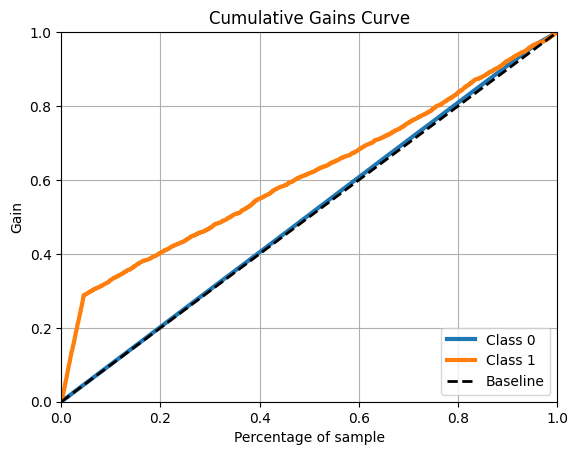

In [68]:
predicted_probas = classifier.predict_proba(X_test)

# The magic happens here
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_test, predicted_probas)
plt.show()

In [69]:
features = X.columns.tolist()
importances_sk = classifier.feature_importances_
feature_importance_sk = {}
for i, feature in enumerate(features):
    feature_importance_sk[feature] = round(importances_sk[i], 3)

feature_importance_sk

{'speed': 0.113,
 'distance': 0.025,
 'direction': 0.071,
 'orientation': 0.079,
 'acceleration': 0.045,
 'sa': 0.046,
 'speed_diff_w_lag1_lag2_id_1': 0.047,
 'distance_diff_w_lag1_lag2_id_1': 0.031,
 'direction_diff_w_lag1_lag2_id_1': 0.055,
 'orientation_diff_w_lag1_lag2_id_1': 0.07,
 'acceleration_diff_w_lag1_lag2_id_1': 0.073,
 'sa_diff_w_lag1_lag2_id_1': 0.05,
 'speed_diff_w_lag1_id_1': 0.033,
 'distance_diff_w_lag1_id_1': 0.032,
 'direction_diff_w_lag1_id_1': 0.05,
 'orientation_diff_w_lag1_id_1': 0.073,
 'acceleration_diff_w_lag1_id_1': 0.056,
 'sa_diff_w_lag1_id_1': 0.049}

In [70]:
df_imp = pd.DataFrame(columns=['feature', 'importance'])
list_imp = []
for feat, value in feature_importance_sk.items():
    list_imp.append((feat,value))

In [71]:
pd.Series(feature_importance_sk).sort_values(ascending=False)

speed                                 0.113
orientation                           0.079
acceleration_diff_w_lag1_lag2_id_1    0.073
orientation_diff_w_lag1_id_1          0.073
direction                             0.071
orientation_diff_w_lag1_lag2_id_1     0.070
acceleration_diff_w_lag1_id_1         0.056
direction_diff_w_lag1_lag2_id_1       0.055
sa_diff_w_lag1_lag2_id_1              0.050
direction_diff_w_lag1_id_1            0.050
sa_diff_w_lag1_id_1                   0.049
speed_diff_w_lag1_lag2_id_1           0.047
sa                                    0.046
acceleration                          0.045
speed_diff_w_lag1_id_1                0.033
distance_diff_w_lag1_id_1             0.032
distance_diff_w_lag1_lag2_id_1        0.031
distance                              0.025
dtype: float64

In [72]:
pd.Series(feature_importance_sk).shape

(18,)

In [73]:
list1= pd.Series(feature_importance_sk).index.to_list()
list2= list(set(pd.Series(feature_importance_sk).index.to_list()))

print(len(list1))
print(len(list2))

18
18


#### XG Boost


In [74]:
from xgboost import XGBClassifier

In [75]:
X_train.columns

Index(['speed', 'distance', 'direction', 'orientation', 'acceleration', 'sa',
       'speed_diff_w_lag1_lag2_id_1', 'distance_diff_w_lag1_lag2_id_1',
       'direction_diff_w_lag1_lag2_id_1', 'orientation_diff_w_lag1_lag2_id_1',
       'acceleration_diff_w_lag1_lag2_id_1', 'sa_diff_w_lag1_lag2_id_1',
       'speed_diff_w_lag1_id_1', 'distance_diff_w_lag1_id_1',
       'direction_diff_w_lag1_id_1', 'orientation_diff_w_lag1_id_1',
       'acceleration_diff_w_lag1_id_1', 'sa_diff_w_lag1_id_1'],
      dtype='object')

In [76]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [77]:
y_pred_xgb = model.predict(X_test)

In [78]:

print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

[[78366   414]
 [ 2726   621]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     78780
           1       0.60      0.19      0.28      3347

    accuracy                           0.96     82127
   macro avg       0.78      0.59      0.63     82127
weighted avg       0.95      0.96      0.95     82127



In [79]:

print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

[[78366   414]
 [ 2726   621]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     78780
           1       0.60      0.19      0.28      3347

    accuracy                           0.96     82127
   macro avg       0.78      0.59      0.63     82127
weighted avg       0.95      0.96      0.95     82127



In [80]:
matthews_corrcoef(y_test, y_pred_xgb)

0.31954660333955465

#### Changing the threshold

In [81]:
probs = model.predict_proba(X_test)

In [82]:
y_pred_035 = np.where(probs >0.35, 1,0)[:,1]

In [83]:
matthews_corrcoef(y_test, y_pred_035)

0.36635789014458725

In [84]:
features = X.columns.tolist()
importances_xgb = model.feature_importances_
feature_importance_xgb = {}
for i, feature in enumerate(features):
    feature_importance_xgb[feature] = round(importances_xgb[i], 3)

feature_importance_xgb

{'speed': 0.277,
 'distance': 0.046,
 'direction': 0.026,
 'orientation': 0.033,
 'acceleration': 0.029,
 'sa': 0.036,
 'speed_diff_w_lag1_lag2_id_1': 0.051,
 'distance_diff_w_lag1_lag2_id_1': 0.047,
 'direction_diff_w_lag1_lag2_id_1': 0.017,
 'orientation_diff_w_lag1_lag2_id_1': 0.033,
 'acceleration_diff_w_lag1_lag2_id_1': 0.058,
 'sa_diff_w_lag1_lag2_id_1': 0.04,
 'speed_diff_w_lag1_id_1': 0.117,
 'distance_diff_w_lag1_id_1': 0.057,
 'direction_diff_w_lag1_id_1': 0.017,
 'orientation_diff_w_lag1_id_1': 0.033,
 'acceleration_diff_w_lag1_id_1': 0.05,
 'sa_diff_w_lag1_id_1': 0.032}

In [85]:
df_imp = pd.DataFrame(columns=['feature', 'importance'])
list_imp = []
for feat, value in feature_importance_xgb.items():
    list_imp.append((feat,value))

In [86]:
pd.Series(feature_importance_xgb).sort_values(ascending=False)

speed                                 0.277
speed_diff_w_lag1_id_1                0.117
acceleration_diff_w_lag1_lag2_id_1    0.058
distance_diff_w_lag1_id_1             0.057
speed_diff_w_lag1_lag2_id_1           0.051
acceleration_diff_w_lag1_id_1         0.050
distance_diff_w_lag1_lag2_id_1        0.047
distance                              0.046
sa_diff_w_lag1_lag2_id_1              0.040
sa                                    0.036
orientation_diff_w_lag1_id_1          0.033
orientation_diff_w_lag1_lag2_id_1     0.033
orientation                           0.033
sa_diff_w_lag1_id_1                   0.032
acceleration                          0.029
direction                             0.026
direction_diff_w_lag1_lag2_id_1       0.017
direction_diff_w_lag1_id_1            0.017
dtype: float32